### Problem Statement

- Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

- Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

- Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [2]:
data = pd.read_csv("data_stocks.csv")
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
data.shape

(41266, 502)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [5]:
data.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [6]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


To answer the problem statements, we can drop the columns which are not needed for this part of the exercise. 

In [7]:
data_stocks = data.copy()
data_stocks.drop(['DATE','SP500'], inplace = True, axis = 1)

#### Problem 1: Which all stocks are apparently similar in performance?


We can find the correlation to see highly correlated variables, stocks in this case. 

In [8]:
data_corr = data_stocks.corr()

In [11]:
data_corr = pd.DataFrame(data = data_corr.values, columns = data_corr.index, index = data_corr.index)
data_corr.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [12]:
#The 10 stcks with a high correlation with AAL stocks
data_corr[data_corr['NASDAQ.AAL'].values > 0.80][:10]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369
NYSE.COH,0.837497,0.161166,0.476242,0.257488,0.111937,0.632158,-0.575362,-0.061769,0.698357,0.040742,...,0.785964,-0.622571,0.270847,0.718301,0.088650,0.407912,0.305606,0.624507,0.488613,0.785750
NYSE.CSRA,0.803510,0.334035,0.832643,0.154026,0.497718,0.768976,-0.616766,0.386223,0.696207,0.346399,...,0.837405,-0.927944,0.649768,0.877170,-0.446198,0.843635,0.770891,0.878215,0.308781,0.810754
NYSE.DAL,0.908578,-0.016610,0.452003,0.194325,0.012064,0.537964,-0.444039,-0.056278,0.628435,0.170080,...,0.776583,-0.736920,0.200001,0.750989,0.051927,0.469302,0.278065,0.610742,0.662851,0.787479
NYSE.DE,0.850040,0.305125,0.677498,0.282661,0.463447,0.787228,-0.649532,0.083421,0.710929,0.205290,...,0.834250,-0.820615,0.571294,0.805954,-0.210496,0.630953,0.587302,0.802758,0.304364,0.809627
NYSE.FBHS,0.816213,-0.126611,0.429645,0.011530,0.310310,0.402018,-0.212418,0.279779,0.465293,0.404898,...,0.772558,-0.655985,0.099429,0.801572,0.020292,0.587787,0.347267,0.497662,0.644646,0.589896


Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

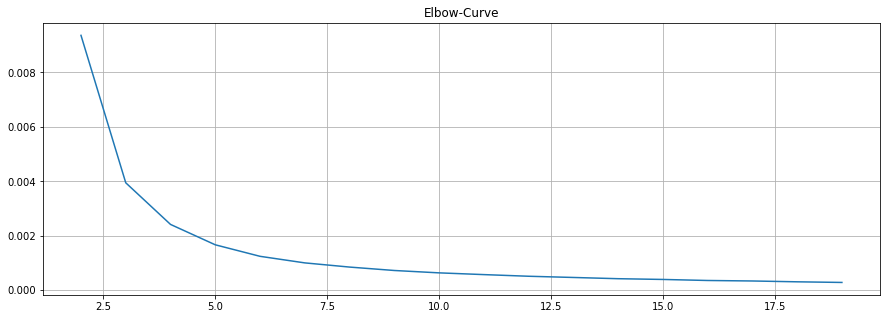

In [21]:
# We will try to find the optimal number of clusters and assign each stock to a specific cluster
# Calculate the average annual percentage return and volatilities over a theoritical one year period

from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()


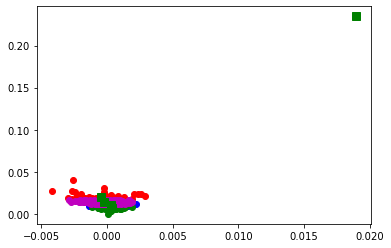

In [22]:

from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

There appears to be an outlier and that can skew the results. We can delete the outlier from our data set and run this again. 

In [23]:
#identify the outlier
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [24]:
#drop the relevant stock from our data
data.drop(['NYSE.XRX','DATE','SP500'],inplace=True,axis=1)

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

# format the data into numpy array to feed into K-means algorithm
 
#recreate data to feed into the algorithm
dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

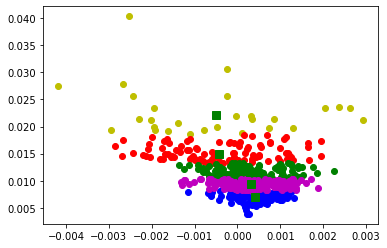

In [25]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [26]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]
for detail in details:
   print(list(detail))

['NASDAQ.AAL', 2]
['NASDAQ.AAPL', 4]
['NASDAQ.ADBE', 4]
['NASDAQ.ADI', 3]
['NASDAQ.ADP', 3]
['NASDAQ.ADSK', 2]
['NASDAQ.AKAM', 2]
['NASDAQ.ALXN', 2]
['NASDAQ.AMAT', 2]
['NASDAQ.AMD', 1]
['NASDAQ.AMGN', 4]
['NASDAQ.AMZN', 3]
['NASDAQ.ATVI', 3]
['NASDAQ.AVGO', 3]
['NASDAQ.BBBY', 2]
['NASDAQ.BIIB', 3]
['NASDAQ.CA', 2]
['NASDAQ.CBOE', 4]
['NASDAQ.CELG', 4]
['NASDAQ.CERN', 4]
['NASDAQ.CHRW', 3]
['NASDAQ.CHTR', 2]
['NASDAQ.CINF', 4]
['NASDAQ.CMCSA', 4]
['NASDAQ.CME', 4]
['NASDAQ.COST', 4]
['NASDAQ.CSCO', 4]
['NASDAQ.CSX', 3]
['NASDAQ.CTAS', 4]
['NASDAQ.CTSH', 0]
['NASDAQ.CTXS', 3]
['NASDAQ.DISCA', 2]
['NASDAQ.DISCK', 2]
['NASDAQ.DISH', 2]
['NASDAQ.DLTR', 2]
['NASDAQ.EA', 2]
['NASDAQ.EBAY', 3]
['NASDAQ.EQIX', 3]
['NASDAQ.ESRX', 2]
['NASDAQ.ETFC', 3]
['NASDAQ.EXPD', 4]
['NASDAQ.EXPE', 3]
['NASDAQ.FAST', 2]
['NASDAQ.FB', 4]
['NASDAQ.FFIV', 2]
['NASDAQ.FISV', 0]
['NASDAQ.FITB', 3]
['NASDAQ.FLIR', 3]
['NASDAQ.FOX', 3]
['NASDAQ.FOXA', 3]
['NASDAQ.GILD', 4]
['NASDAQ.GOOG', 4]
['NASDAQ.GOOGL', 4]
['

In [27]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

4    152
3    121
0    103
2     95
1     28
Name: Cluster_No, dtype: int64

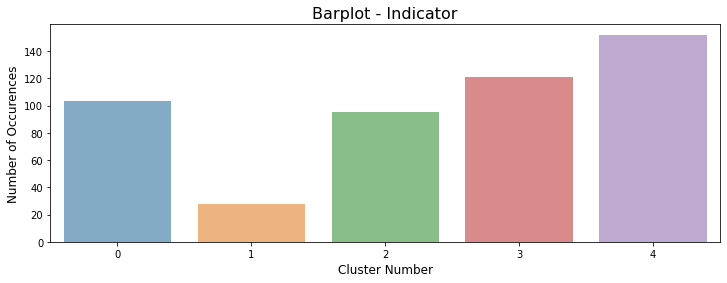

In [28]:
ind = df.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

We can apply PCA to find the stocks that are moving together.

[46.97 64.24 76.27 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.58 95.03 95.44 95.79 96.12 96.38 96.61 96.83 97.02 97.18 97.33 97.46
 97.59 97.71 97.82 97.92 98.01 98.09 98.17 98.25 98.32 98.39 98.45 98.51
 98.57 98.62 98.67 98.72 98.76 98.8  98.84 98.88 98.92 98.95 98.98 99.01
 99.04 99.07 99.1  99.13 99.16 99.18 99.2  99.22 99.24 99.26 99.28 99.3
 99.32 99.34 99.36 99.38 99.4  99.42 99.44 99.46 99.47 99.48 99.49 99.5
 99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61 99.62
 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73 99.74
 99.75 99.76 99.77 99.78 99.79 99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8  99.8
 99.8  99.8  99.8  99.8  99.8  99.8 ]


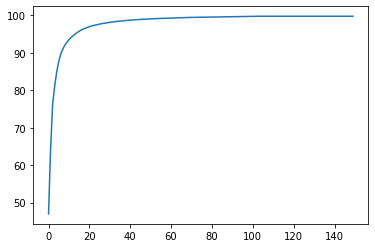

In [38]:
from sklearn.preprocessing import StandardScaler

df1 = data.copy()
#dt.drop(['DATE','SP500'],inplace=True,axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = df1.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

plt.plot(var1)

In [39]:
# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.54489969   9.98399845  -9.36306484 ...   0.55428811   0.1186236
    2.41627143]
 [ 25.64396757   9.87058075  -9.78352591 ...   0.45631845   0.20655612
    2.30813321]
 [ 25.55832141   9.80326405  -9.65680691 ...   0.53281193   0.07298863
    2.05359342]
 ...
 [-22.74268953  13.34385803   6.52612773 ...  -2.1367565    1.22287053
   -0.32966482]
 [-22.58678189  13.43459792   6.63993624 ...  -2.12242055   1.22853617
   -0.35633475]
 [-22.69505715  13.37926134   6.56805244 ...  -2.15990257   1.20928591
   -0.31586242]]


In [40]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03932727 0.04119779 0.06302875 ... 0.06260427 0.00257534 0.05182548]
 [0.06427995 0.03397585 0.00193476 ... 0.02032991 0.08130274 0.05943219]
 [0.03996486 0.06394349 0.01187376 ... 0.02086513 0.06626943 0.02349888]
 ...
 [0.01112078 0.00464789 0.00478198 ... 0.01180398 0.04412948 0.01139299]
 [0.07466097 0.01910295 0.01012802 ... 0.00157165 0.01860583 0.0485882 ]
 [0.02239811 0.03323433 0.03675707 ... 0.00423229 0.02055002 0.02458882]]


In [41]:
stocks_data = pd.DataFrame(pca.components_, columns = dt.columns)
stocks_data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WY,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039327,-0.041198,-0.063029,-0.009854,-0.035888,-0.054813,0.050489,-0.035384,-0.044205,-0.014613,...,0.044324,-0.049520,0.057072,-0.054750,-0.050685,0.047282,-0.061482,-0.062604,0.002575,-0.051825
1,-0.064280,0.033976,0.001935,-0.032403,0.043516,-0.029425,0.016081,0.058270,-0.052583,0.012303,...,-0.022112,-0.058897,0.030257,0.013746,-0.040753,-0.052867,0.031522,-0.020330,-0.081303,-0.059432
2,-0.039965,0.063943,0.011874,0.043297,-0.037457,0.040367,-0.053789,-0.051299,0.030592,-0.086503,...,-0.046046,-0.003326,0.022205,0.059502,-0.034738,-0.028530,-0.004580,0.020865,-0.066269,0.023499
3,0.007225,0.077156,0.008401,-0.028080,-0.018027,0.008762,-0.032382,0.034501,0.051270,-0.078063,...,-0.054202,0.021500,0.061063,-0.039785,0.027499,0.012080,0.002698,-0.002802,-0.049638,0.015167
4,-0.033182,-0.017369,0.002557,-0.038106,-0.101883,-0.034799,-0.010965,0.037455,-0.039823,-0.013665,...,-0.081522,-0.036786,-0.011903,-0.030101,-0.012076,-0.045974,-0.002891,-0.001254,-0.003203,0.005309
